#### Finding edges with canny

In [9]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

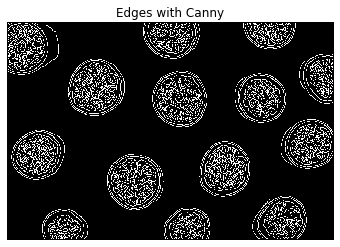

In [10]:
# Import the canny edge detector 
from skimage.feature import canny
from skimage import data
from skimage import io, color
import matplotlib.pyplot as plt

# load image
grapefruit = io.imread('toronjas.jpg')

# Convert image to grayscale
grapefruit = color.rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image
show_image(canny_edges, "Edges with Canny")

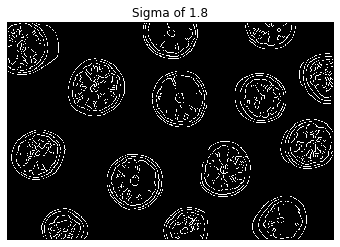

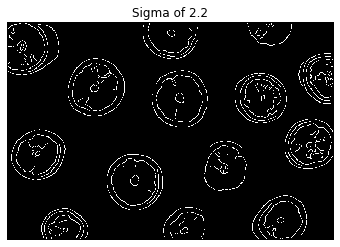

In [11]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")

#### Corner detection

Corner can be defined as the intersection of two edges. It can also be a junction of contours.

Herris Corner Detector is a corner detection operator widely used in computer vision algorithm.

In [16]:
def show_image_with_corners(image, coord, title="Corners detected"):
    plt.imshow(image, interpolation="nearest", cmap="gray")
    plt.title(title)
    plt.plot(coord[:, 1], coord[:, 0], "+r", markersize=15)
    plt.axis("off")
    plt.show()

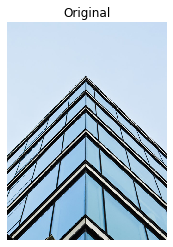

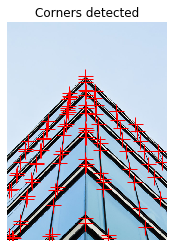

In [21]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

building_image = io.imread("corners_building_top.jpg")

# Convert image from RGB-3 to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

With a min_distance setted to 2, we detect a total 98 corners in the image.
With a min_distance setted to 40, we detect a total 36 corners in the image.


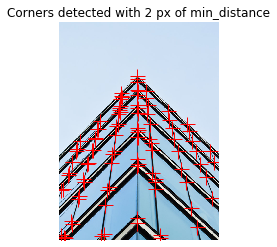

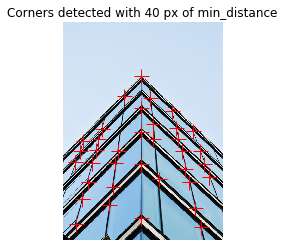

In [24]:
# Find the peaks with a min distance of 2 pixels
coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance setted to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40)
print("With a min_distance setted to 40, we detect a total", len(coords_w_min_40), "corners in the image.")

show_image_with_corners(building_image, coords_w_min_2, "Corners detected with 2 px of min_distance")
show_image_with_corners(building_image, coords_w_min_40, "Corners detected with 40 px of min_distance")

#### Face detection


In [48]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches


def show_detected_face(result, detected, title="face image"):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap("gray")
    plt.title(title)
    plt.axis("off")
    
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2))
    plt.show()

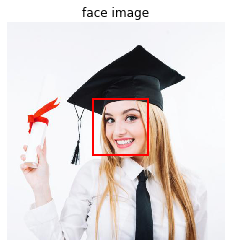

In [50]:
from skimage.feature import Cascade
from skimage import data
from skimage import io

image = io.imread("sally2.jpg")

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))

# Show the detected faces
show_detected_face(image, detected)

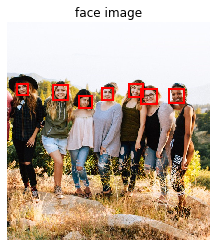

In [51]:
friends_image = io.imread("face_det_friends22.jpg")

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

#### Segmentation


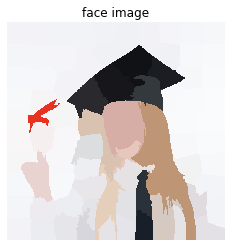

In [58]:
from skimage.segmentation import slic
from skimage.feature import Cascade
from skimage.color import label2rgb

image = io.imread("sally2.jpg")

# Obtain the segmentation with default 100 regions
segments = slic(image)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)